# DOCUMENTATION

<h2>Introduction</h2>

This project aims to analyze real time data from Twitter in order to see whether people have a positive opinion about a given videogame and how it changes over time.

In order to do that, we employ various technologies: Logstash, Kafka, Spark, ElasticSearch and Kibana.

THE PIPELINE

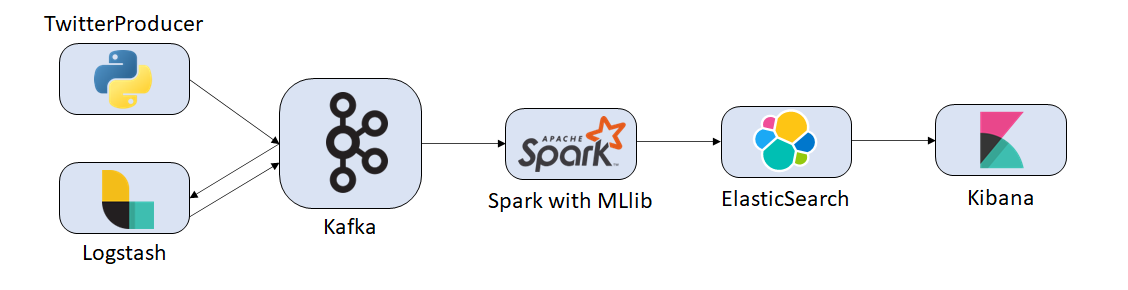

We use a python script to create a twitter filtered stream, connecting to the endpoint at "https://api.twitter.com/2/tweets/search/stream/rules", which allow us to fetch tweets in real time.

The tweets are passed to Logstash and then to Kafka. From Kafka, tweets are read by Spark, which, using a dataset generated with Steam reviews to train a machine learning alghoritm provided by MLlib, analyses each tweet and evaluetes whether the comment is a positive or negative one.

The results are then sent to ElasticSearch, which stores them in a database.

With Kibana, we visualize the data we have gathered.

DATASET AND MACHINE LEARING

The dataset consists of the reviews from Steam of a given game. By changing the game to match our twitter topic, we can get a dataset more tailored to that specific game.

With MLlib, we train on the provided dataset and then we apply Logistic Regression to incoming tweets, assigning them a value equal to 1 when positive and equal to 0 when negative.

<h1>USAGE</h1>

This project requires Docker and a developer Twitter account

<h2>Generating a dataset</h2>

This step is optional since the project comes with a dataset, but changing it may yield better results.
The current dataset will be overridden when you generate a new one. A copy of the original dataset is stored in "dataset backup" in case you want to restore it, and the current dataset is located in ".dataset".

Note: you need a network named tap for this step. You can create it with "docker network create --subnet 10.0.100.0/24 tap"

<h2>Generating a dataset</h2>

First, you need to get the appID of the game you want.

Go to https://store.steampowered.com and search for your game.

When you are on the game page, in the url, after app/ you will find the ID.

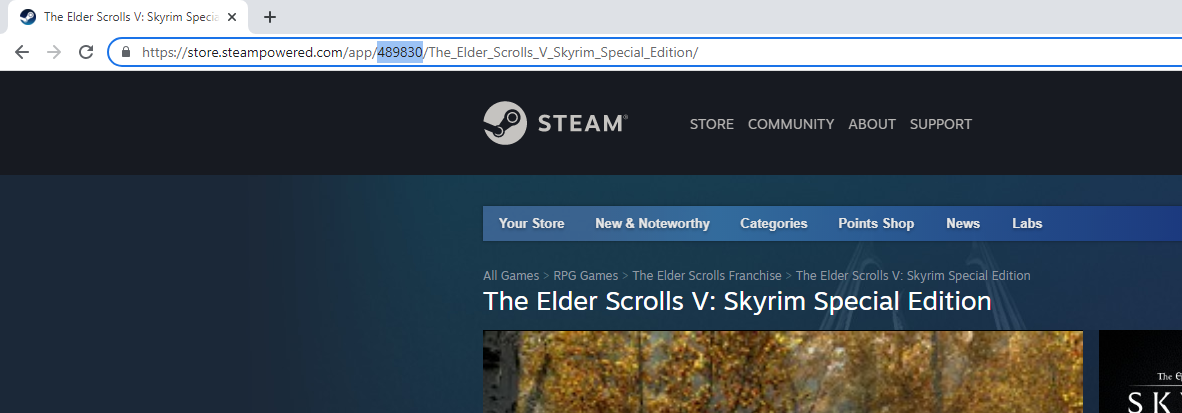

<h2>Generating a dataset</h2>


Open a shell and navigate to the bin folder inside the project.

Then write:

    bash createDatasetSteamReview.sh [appID] [limit]

where [limit] is an optional parameter which indicate the number of reviews after which the script stop making Steam API calls and therefore stop. Note that it will stop sooner if it can't find any more reviews.

Example:

    bash createDatasetSteamReview.sh 578080 10000


<h2>Running the project</h2>

First we need the credentials necessary for the Twitter API call.

Open the folder /python/bin and open the file TWITTER_CREDENTIALS.txt

On the first line put your Twitter bearer token.

Now we need to set a topic

Open TWITTER_KEYWORD.txt and put the keywords in the first line

<h2>Running the project</h2>

Open a shell in the project

Build and run all containers:

    docker compose up

Stopping the containers (open another shell to execute this command):

    docker compose stop
    
All tweets will remain in the EasticSearch database, so you you will not lose any data

Before running the project again, you must delete the kafkaserver and zookeeper containers, then use again:
    
    docker compose up
    

<h2>Running the project</h2>

<h3>Visualizing the data:</h3>

Open your browser and go to http://localhost:5601/app/home

If a prompt appears, close it, then click manage. In the menu on the left, under Kibana, click on Saved Objects. Then click import and select kibana_export.ndjson from the project folder.

Confirm and then go to Main Dashboard.

You will see two graph. The first one is a pie chart with the percentage of positive and negative tweets. The second one represents the number of positive and negative tweets across time.

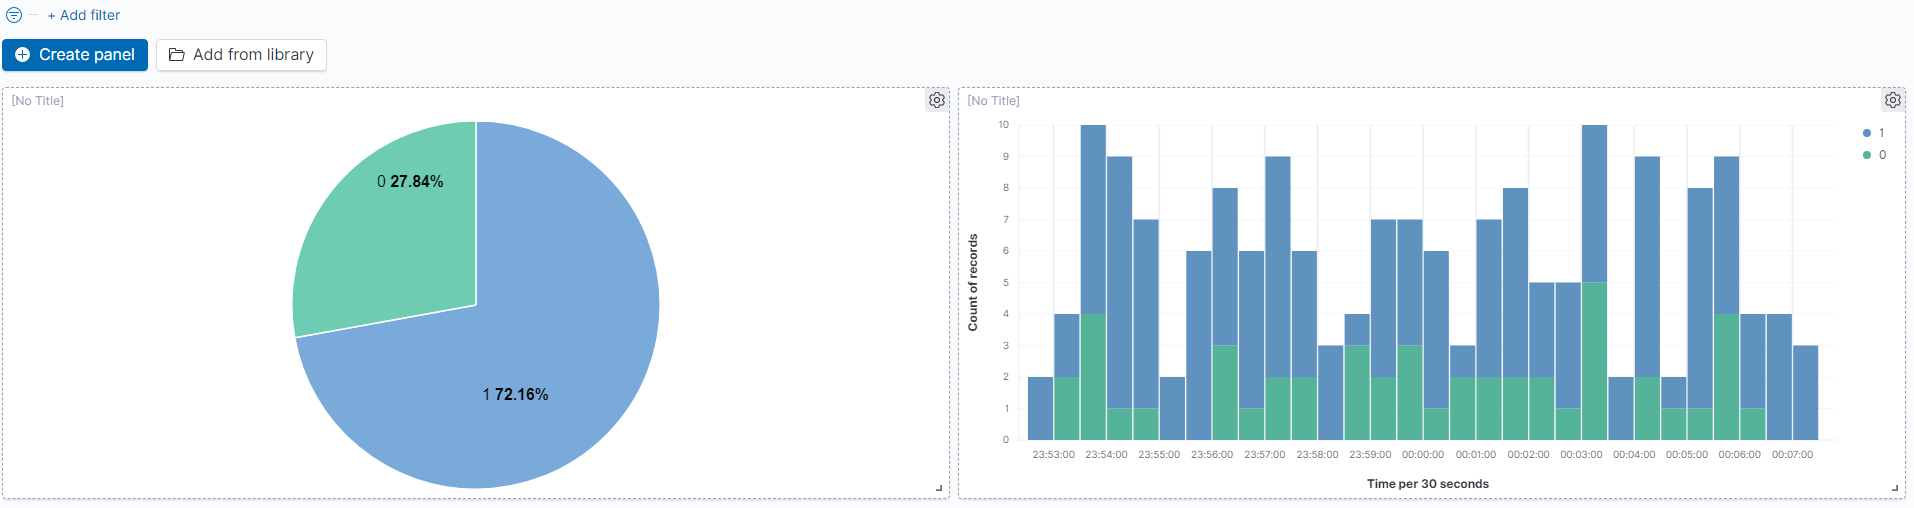